Import Libraries

In [105]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

#!pip install dython needed for associations function
from dython.nominal import associations
import seaborn as sns

Load In game level dataset

In [23]:
Nba_Game_Level_data = pd.read_csv("/content/sample_data/game-level-dataset-cleaned (2).csv")

Read Data

In [34]:
#print(Nba_Game_Level_data)

Display Dependent Variable

In [30]:
print(Nba_Game_Level_data['HOME_NAME'])

0               Spurs
1               Spurs
2             Pistons
3             Pistons
4             Pistons
             ...     
27652       Grizzlies
27653         Pistons
27654       Mavericks
27655        Warriors
27656    Timberwolves
Name: HOME_NAME, Length: 27657, dtype: object


Remove Columns

In [38]:
#Removing Home_id, Game_id, Home_minutes, Away_id, Away_tricode, Away_minutes
drop_vars = ['GAME_ID', 'HOME_ID', "HOME_MINUTES", "AWAY_ID", "AWAY_TRICODE", "AWAY_MINUTES"]
Nba_Game_Level_data_new = Nba_Game_Level_data.drop(drop_vars, axis=1)
Nba_Game_Level_data_new.head()

,HOME_NAME,HOME_TRICODE,HOME_FIELD_GOALS_MADE,HOME_FIELD_GOALS_ATTEMPTED,HOME_FIELD_GOALS_PERCENTAGE,HOME_THREE_POINTERS_MADE,HOME_THREE_POINTERS_ATTEMPTED,HOME_THREE_POINTERS_PERCENTAGE,HOME_FREE_THROWS_MADE,HOME_FREE_THROWS_ATTEMPTED,HOME_FREE_THROWS_PERCENTAGE,HOME_REBOUNDS_OFFENSIVE,HOME_REBOUNDS_DEFENSIVE,HOME_REBOUNDS_TOTAL,HOME_ASSISTS,HOME_STEALS,HOME_BLOCKS,HOME_TURNOVERS,HOME_FOULS_PERSONAL,HOME_POINTS,HOME_PLUS_MINUS_POINTS,AWAY_NAME,AWAY_FIELD_GOALS_MADE,AWAY_FIELD_GOALS_ATTEMPTED,AWAY_FIELD_GOALS_PERCENTAGE,AWAY_THREE_POINTERS_MADE,AWAY_THREE_POINTERS_ATTEMPTED,AWAY_THREE_POINTERS_PERCENTAGE,AWAY_FREE_THROWS_MADE,AWAY_FREE_THROWS_ATTEMPTED,AWAY_FREE_THROWS_PERCENTAGE,AWAY_REBOUNDS_OFFENSIVE,AWAY_REBOUNDS_DEFENSIVE,AWAY_REBOUNDS_TOTAL,AWAY_ASSISTS,AWAY_STEALS,AWAY_BLOCKS,AWAY_TURNOVERS,AWAY_FOULS_PERSONAL,AWAY_POINTS,AWAY_PLUS_MINUS_POINTS
0,Spurs,SAS,29.0,68.0,0.426,7.0,11.0,0.636,16.0,19.0,0.842,8.0,30.0,38.0,14.0,4.0,7.0,13.0,20.0,81.0,7.0,Pistons,31.0,74.0,0.419,2.0,14.0,0.143,10.0,14.0,0.714,8.0,26.0,34.0,17.0,8.0,6.0,6.0,24.0,74.0,-7.0
1,Spurs,SAS,31.0,75.0,0.413,8.0,28.0,0.286,16.0,26.0,0.615,13.0,30.0,43.0,15.0,3.0,2.0,11.0,18.0,86.0,-9.0,Pistons,37.0,79.0,0.468,8.0,17.0,0.471,13.0,19.0,0.684,13.0,27.0,40.0,19.0,6.0,8.0,5.0,21.0,95.0,9.0
2,Pistons,DET,37.0,84.0,0.440,2.0,9.0,0.222,19.0,23.0,0.826,16.0,26.0,42.0,17.0,7.0,11.0,11.0,20.0,95.0,-1.0,Spurs,38.0,82.0,0.463,8.0,20.0,0.400,12.0,21.0,0.571,19.0,26.0,45.0,20.0,3.0,3.0,16.0,26.0,96.0,1.0
3,Pistons,DET,41.0,90.0,0.456,2.0,9.0,0.222,18.0,23.0,0.783,13.0,34.0,47.0,23.0,13.0,6.0,3.0,22.0,102.0,31.0,Spurs,26.0,70.0,0.371,5.0,15.0,0.333,14.0,24.0,0.583,12.0,32.0,44.0,15.0,1.0,9.0,17.0,21.0,71.0,-31.0
4,Pistons,DET,40.0,85.0,0.471,3.0,14.0,0.214,13.0,17.0,0.765,17.0,27.0,44.0,22.0,12.0,10.0,11.0,18.0,96.0,17.0,Spurs,29.0,67.0,0.433,8.0,17.0,0.471,13.0,20.0,0.650,10.0,27.0,37.0,16.0,7.0,3.0,18.0,21.0,79.0,-17.0


Change Home Name Dependent variable to be categorical

In [126]:
Nba_Game_Level_data_new['HOME_NAME'] = Nba_Game_Level_data_new['HOME_NAME'].astype('category')

Missing Value Analysis

In [60]:
def show_missing_vals(df:pd.DataFrame)->pd.DataFrame:
	"""
	Returns a sorted dataframe with variable names and percentage of missing values
	"""
	return Nba_Game_Level_data_new.isna().sum().divide(len(Nba_Game_Level_data_new)).sort_values(ascending=False)

show_missing_vals(Nba_Game_Level_data_new)

,0
HOME_NAME,0.000506
HOME_TRICODE,0.000506
HOME_FIELD_GOALS_MADE,0.000506
HOME_FIELD_GOALS_ATTEMPTED,0.000506
HOME_FIELD_GOALS_PERCENTAGE,0.000506
HOME_THREE_POINTERS_MADE,0.000506
HOME_THREE_POINTERS_ATTEMPTED,0.000506
HOME_THREE_POINTERS_PERCENTAGE,0.000506
HOME_FREE_THROWS_MADE,0.000506
HOME_FREE_THROWS_ATTEMPTED,0.000506


Remove Missing Values Numeric variables (Mean)

In [ ]:
def impute_w_mean(df:pd.DataFrame)->pd.DataFrame:
    """
    Imputes missing values with the mean for numeric columns only.
    """
    numeric_cols = Nba_Game_Level_data_new.select_dtypes(include=np.number).columns # Select only numeric columns
    df_mean = Nba_Game_Level_data_new[numeric_cols].mean() # Calculate the mean of numeric columns
    return df.fillna(df_mean) # Fill NaN values in numeric columns with their means


Nba_Game_Level_data_new = impute_w_mean(Nba_Game_Level_data_new)
show_missing_vals(Nba_Game_Level_data_new)


Removing Missing Variables categorical variables (Mode)

In [ ]:
def impute_w_mode(df:pd.DataFrame)->pd.DataFrame:
    df_mode = Nba_Game_Level_data_new.mode().stack().reset_index(level=0, drop=True)
    return Nba_Game_Level_data_new.fillna(df_mode)
Nba_Game_Level_data_new = impute_w_mode(Nba_Game_Level_data_new)
impute_w_mode(Nba_Game_Level_data_new)
show_missing_vals(Nba_Game_Level_data_new)

Check to see if Imputation has worked ✅

In [129]:
show_missing_vals(Nba_Game_Level_data_new)

,0
HOME_NAME,0.0
HOME_TRICODE,0.0
HOME_FIELD_GOALS_MADE,0.0
HOME_FIELD_GOALS_ATTEMPTED,0.0
HOME_FIELD_GOALS_PERCENTAGE,0.0
HOME_THREE_POINTERS_MADE,0.0
HOME_THREE_POINTERS_ATTEMPTED,0.0
HOME_THREE_POINTERS_PERCENTAGE,0.0
HOME_FREE_THROWS_MADE,0.0
HOME_FREE_THROWS_ATTEMPTED,0.0


Dummy Variable

In [130]:
#Create dummy variables for ALL categorical data
cat_vars = Nba_Game_Level_data_new.select_dtypes(exclude=np.number).columns.tolist()

# Create dummy variables
Home_Name_dummy = pd.get_dummies(Nba_Game_Level_data_new, columns=cat_vars, drop_first=True, dtype=int)
Home_Name_dummy.head()

,HOME_FIELD_GOALS_MADE,HOME_FIELD_GOALS_ATTEMPTED,HOME_FIELD_GOALS_PERCENTAGE,HOME_THREE_POINTERS_MADE,HOME_THREE_POINTERS_ATTEMPTED,HOME_THREE_POINTERS_PERCENTAGE,HOME_FREE_THROWS_MADE,HOME_FREE_THROWS_ATTEMPTED,HOME_FREE_THROWS_PERCENTAGE,HOME_REBOUNDS_OFFENSIVE,HOME_REBOUNDS_DEFENSIVE,HOME_REBOUNDS_TOTAL,HOME_ASSISTS,HOME_STEALS,HOME_BLOCKS,HOME_TURNOVERS,HOME_FOULS_PERSONAL,HOME_POINTS,HOME_PLUS_MINUS_POINTS,AWAY_FIELD_GOALS_MADE,AWAY_FIELD_GOALS_ATTEMPTED,AWAY_FIELD_GOALS_PERCENTAGE,AWAY_THREE_POINTERS_MADE,AWAY_THREE_POINTERS_ATTEMPTED,AWAY_THREE_POINTERS_PERCENTAGE,AWAY_FREE_THROWS_MADE,AWAY_FREE_THROWS_ATTEMPTED,AWAY_FREE_THROWS_PERCENTAGE,AWAY_REBOUNDS_OFFENSIVE,AWAY_REBOUNDS_DEFENSIVE,AWAY_REBOUNDS_TOTAL,AWAY_ASSISTS,AWAY_STEALS,AWAY_BLOCKS,AWAY_TURNOVERS,AWAY_FOULS_PERSONAL,AWAY_POINTS,AWAY_PLUS_MINUS_POINTS,HOME_NAME_Adecco ASVEL,HOME_NAME_Alba Berlin,HOME_NAME_Armani Jeans Milano,HOME_NAME_BC,HOME_NAME_Baloncesto,HOME_NAME_Barry,HOME_NAME_Basket,HOME_NAME_Bobcats,HOME_NAME_Bucks,HOME_NAME_Bulls,HOME_NAME_CSKA,HOME_NAME_Cavaliers,HOME_NAME_Celtics,HOME_NAME_Chuck,HOME_NAME_Clippers,HOME_NAME_Deron,HOME_NAME_Durant,HOME_NAME_EA7 Emporio Armani Milano,HOME_NAME_East,HOME_NAME_Efes Pilsen,HOME_NAME_FC Barcelona Regal,HOME_NAME_Fenerbahce Ulker,HOME_NAME_Giannis,HOME_NAME_Grizzlies,HOME_NAME_Hawks,HOME_NAME_Heat,HOME_NAME_Home,HOME_NAME_Hornets,HOME_NAME_Isiah,HOME_NAME_Jalen,HOME_NAME_Jason,HOME_NAME_Jazz,HOME_NAME_Kings,HOME_NAME_Knicks,HOME_NAME_Lakers,HOME_NAME_LeBron,HOME_NAME_Lottomatica Roma,HOME_NAME_MMT Estudiantes,HOME_NAME_Maccabi Elite,HOME_NAME_Magic,HOME_NAME_Mavericks,HOME_NAME_Nets,HOME_NAME_Nique,HOME_NAME_Nuggets,HOME_NAME_Pacers,HOME_NAME_Pau,HOME_NAME_Pelicans,HOME_NAME_Pistons,HOME_NAME_Raptors,HOME_NAME_Real Madrid,HOME_NAME_Regal FC,HOME_NAME_Rockets,HOME_NAME_Ryan,HOME_NAME_Sophomores,HOME_NAME_Spurs,HOME_NAME_Stephen,HOME_NAME_Stephen A,HOME_NAME_Suns,HOME_NAME_SuperSonics,HOME_NAME_Tamika,HOME_NAME_Team China,HOME_NAME_Team Chuck,HOME_NAME_Thunder,HOME_NAME_Timberwolves,HOME_NAME_Trail Blazers,HOME_NAME_USA,HOME_NAME_Unicaja Malaga,HOME_NAME_Virtus Lottomatica,HOME_NAME_Warriors,HOME_NAME_Webber,HOME_NAME_West,HOME_NAME_Wilbon,HOME_NAME_Winterthur FC,HOME_NAME_Wizards,HOME_NAME_World,HOME_TRICODE_ATL,HOME_TRICODE_BAR,HOME_TRICODE_BKN,HOME_TRICODE_BOS,HOME_TRICODE_CHA,HOME_TRICODE_CHI,HOME_TRICODE_CHK,HOME_TRICODE_CHN,HOME_TRICODE_CLE,HOME_TRICODE_DAL,HOME_TRICODE_DEN,HOME_TRICODE_DET,HOME_TRICODE_DRN,HOME_TRICODE_DRT,HOME_TRICODE_EAM,HOME_TRICODE_EPT,HOME_TRICODE_EST,HOME_TRICODE_FBU,HOME_TRICODE_FCB,HOME_TRICODE_GNS,HOME_TRICODE_GSW,HOME_TRICODE_HME,HOME_TRICODE_HOU,HOME_TRICODE_IAH,HOME_TRICODE_IND,HOME_TRICODE_JAL,HOME_TRICODE_JAS,HOME_TRICODE_KHI,HOME_TRICODE_LAC,HOME_TRICODE_LAL,HOME_TRICODE_LBN,HOME_TRICODE_LRO,HOME_TRICODE_LYV,HOME_TRICODE_MAL,HOME_TRICODE_MEM,HOME_TRICODE_MIA,HOME_TRICODE_MIL,HOME_TRICODE_MIN,HOME_TRICODE_MLN,HOME_TRICODE_MMT,HOME_TRICODE_MOS,HOME_TRICODE_MTA,HOME_TRICODE_NIQ,HOME_TRICODE_NJN,HOME_TRICODE_NOH,HOME_TRICODE_NOK,HOME_TRICODE_NOP,HOME_TRICODE_NYK,HOME_TRICODE_OKC,HOME_TRICODE_ORL,HOME_TRICODE_PAU,HOME_TRICODE_PHI,HOME_TRICODE_PHX,HOME_TRICODE_POR,HOME_TRICODE_RMA,HOME_TRICODE_RMD,HOME_TRICODE_ROM,HOME_TRICODE_RYN,HOME_TRICODE_SAC,HOME_TRICODE_SAS,HOME_TRICODE_SEA,HOME_TRICODE_SPH,HOME_TRICODE_STA,HOME_TRICODE_STP,HOME_TRICODE_TAM,HOME_TRICODE_TOR,HOME_TRICODE_UBB,HOME_TRICODE_USA,HOME_TRICODE_UTA,HOME_TRICODE_WAS,HOME_TRICODE_WEB,HOME_TRICODE_WLB,HOME_TRICODE_WLD,HOME_TRICODE_WST,AWAY_NAME_76ers,AWAY_NAME_Away,AWAY_NAME_Barry,AWAY_NAME_Basketball Club of Brazil,AWAY_NAME_Bobcats,AWAY_NAME_Breakers,AWAY_NAME_Bucks,AWAY_NAME_Bullets,AWAY_NAME_Bulls,AWAY_NAME_CSKA,AWAY_NAME_Caja Laboral,AWAY_NAME_Cavaliers,AWAY_NAME_Celtics,AWAY_NAME_Clippers,AWAY_NAME_Detlef,AWAY_NAME_Ducks,AWAY_NAME_Durant,AWAY_NAME_Dwyane,AWAY_NAME_East,AWAY_NAME_Efes Pilsen,AWAY_NAME_Fenerbahce Sports Club,AWAY_NAME_Flamengo,AWAY_NAME_Giannis,AWAY_NAME_Grizzlies,AWAY_NAME_Hawks,AWAY_NAME_

Removing Colinear Variables

In [132]:
def removeHighCorrFeatures(data,dep_var, thresh):

    # Compute a corr_matrix and obtain abs value of the corr. Recall corrs are in the range [-1,1]
    corr_matrix = associations(dataset=data.drop(dep_var, axis=1), compute_only=True)['corr'].abs()

    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # for loop to drop all features where abs(correlation) > threshold
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column]>thresh)]

    # assign to df
    new_data = data.drop(to_drop, axis=1)

    return new_data

removeHighCorrFeatures(Home_Name_dummy, 'HOME_NAME_Pelicans', 0.8)

,HOME_FIELD_GOALS_MADE,HOME_FIELD_GOALS_ATTEMPTED,HOME_FIELD_GOALS_PERCENTAGE,HOME_THREE_POINTERS_MADE,HOME_THREE_POINTERS_PERCENTAGE,HOME_FREE_THROWS_MADE,HOME_FREE_THROWS_PERCENTAGE,HOME_REBOUNDS_OFFENSIVE,HOME_REBOUNDS_DEFENSIVE,HOME_ASSISTS,HOME_STEALS,HOME_BLOCKS,HOME_TURNOVERS,HOME_FOULS_PERSONAL,HOME_PLUS_MINUS_POINTS,AWAY_FIELD_GOALS_MADE,AWAY_FIELD_GOALS_ATTEMPTED,AWAY_FIELD_GOALS_PERCENTAGE,AWAY_THREE_POINTERS_MADE,AWAY_THREE_POINTERS_PERCENTAGE,AWAY_FREE_THROWS_MADE,AWAY_FREE_THROWS_PERCENTAGE,AWAY_REBOUNDS_OFFENSIVE,AWAY_REBOUNDS_DEFENSIVE,AWAY_ASSISTS,AWAY_STEALS,AWAY_BLOCKS,AWAY_TURNOVERS,HOME_NAME_Adecco ASVEL,HOME_NAME_Alba Berlin,HOME_NAME_Armani Jeans Milano,HOME_NAME_BC,HOME_NAME_Baloncesto,HOME_NAME_Barry,HOME_NAME_Basket,HOME_NAME_Bobcats,HOME_NAME_Bucks,HOME_NAME_Bulls,HOME_NAME_CSKA,HOME_NAME_Cavaliers,HOME_NAME_Celtics,HOME_NAME_Chuck,HOME_NAME_Clippers,HOME_NAME_Deron,HOME_NAME_Durant,HOME_NAME_EA7 Emporio Armani Milano,HOME_NAME_East,HOME_NAME_Efes Pilsen,HOME_NAME_FC Barcelona Regal,HOME_NAME_Fenerbahce Ulker,HOME_NAME_Giannis,HOME_NAME_Grizzlies,HOME_NAME_Hawks,HOME_NAME_Heat,HOME_NAME_Home,HOME_NAME_Hornets,HOME_NAME_Isiah,HOME_NAME_Jalen,HOME_NAME_Jason,HOME_NAME_Jazz,HOME_NAME_Kings,HOME_NAME_Knicks,HOME_NAME_Lakers,HOME_NAME_LeBron,HOME_NAME_Lottomatica Roma,HOME_NAME_MMT Estudiantes,HOME_NAME_Maccabi Elite,HOME_NAME_Magic,HOME_NAME_Mavericks,HOME_NAME_Nets,HOME_NAME_Nique,HOME_NAME_Nuggets,HOME_NAME_Pacers,HOME_NAME_Pau,HOME_NAME_Pelicans,HOME_NAME_Pistons,HOME_NAME_Raptors,HOME_NAME_Real Madrid,HOME_NAME_Regal FC,HOME_NAME_Rockets,HOME_NAME_Ryan,HOME_NAME_Sophomores,HOME_NAME_Spurs,HOME_NAME_Stephen,HOME_NAME_Stephen A,HOME_NAME_Suns,HOME_NAME_SuperSonics,HOME_NAME_Tamika,HOME_NAME_Team China,HOME_NAME_Team Chuck,HOME_NAME_Thunder,HOME_NAME_Timberwolves,HOME_NAME_Trail Blazers,HOME_NAME_USA,HOME_NAME_Unicaja Malaga,HOME_NAME_Virtus Lottomatica,HOME_NAME_Warriors,HOME_NAME_Webber,HOME_NAME_West,HOME_NAME_Wilbon,HOME_NAME_Winterthur FC,HOME_NAME_Wizards,HOME_NAME_World,HOME_TRICODE_BAR,HOME_TRICODE_BKN,HOME_TRICODE_CHA,HOME_TRICODE_CHK,HOME_TRICODE_NJN,HOME_TRICODE_NOH,HOME_TRICODE_NOK,HOME_TRICODE_NOP,HOME_TRICODE_PHI,HOME_TRICODE_RMA,HOME_TRICODE_RMD,AWAY_NAME_76ers,AWAY_NAME_Barry,AWAY_NAME_Basketball Club of Brazil,AWAY_NAME_Bobcats,AWAY_NAME_Breakers,AWAY_NAME_Bucks,AWAY_NAME_Bullets,AWAY_NAME_Bulls,AWAY_NAME_CSKA,AWAY_NAME_Caja Laboral,AWAY_NAME_Cavaliers,AWAY_NAME_Celtics,AWAY_NAME_Clippers,AWAY_NAME_Detlef,AWAY_NAME_Ducks,AWAY_NAME_Durant,AWAY_NAME_Efes Pilsen,AWAY_NAME_Fenerbahce Sports Club,AWAY_NAME_Flamengo,AWAY_NAME_Giannis,AWAY_NAME_Grizzlies,AWAY_NAME_Hawks,AWAY_NAME_Heat,AWAY_NAME_Hornets,AWAY_NAME_Jazz,AWAY_NAME_Joakim,AWAY_NAME_Kings,AWAY_NAME_Knicks,AWAY_NAME_Lakers,AWAY_NAME_LeBron,AWAY_NAME_Lietuvos Rytas,AWAY_NAME_Long-Lions,AWAY_NAME_Maccabi Electra,AWAY_NAME_Maccabi Elite,AWAY_NAME_Maccabi Haifa,AWAY_NAME_Maccabi Ra'anana,AWAY_NAME_Magic,AWAY_NAME_Mavericks,AWAY_NAME_Montepaschi Siena,AWAY_NAME_Nets,AWAY_NAME_Nuggets,AWAY_NAME_Olympiacos,AWAY_NAME_Pacers,AWAY_NAME_Panathinaikos,AWAY_NAME_Partizan,AWAY_NAME_Pelicans,AWAY_NAME_Pistons,AWAY_NAME_Raptors,AWAY_NAME_Real Madrid,AWAY_NAME_Regal FC,AWAY_NAME_Rockets,AWAY_NAME_San Lorenzo,AWAY_NAME_Shanghai Sharks,AWAY_NAME_Sharks,AWAY_NAME_Spurs,AWAY_NAME_Suns,AWAY_NAME_SuperSonics,AWAY_NAME_Taipans,AWAY_NAME_Thunder,AWAY_NAME_Timberwolves,AWAY_NAME_Trail Blazers,AWAY_NAME_United,AWAY_NAME_Warriors,AWAY_NAME_Wildcats,AWAY_NAME_Wizards,AWAY_NAME_Worthy,AWAY_NAME_Zalgiris Kaunas
0,29.0,68.0,0.426,7.0,0.636,16.0,0.842,8.0,30.0,14.0,4.0,7.0,13.0,20.0,7.0,31.0,74.0,0.419,2.0,0.143,10.0,0.714,8.0,26.0,17.0,8.0,6.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,31.0,75.0,0.413

Data Partioning

In [135]:
# Identify dependent and independent variables
#Partition the data such that 80% is used for training and 20% is used for testing

# Indep and dependent variables used in the models
dep_var = Home_Name_dummy['HOME_NAME_Pelicans']
indep_var = Home_Name_dummy.drop('HOME_NAME_Pelicans', axis=1)

# Partition data into training (80%) and testing (20%)
train_X, test_X, train_y, test_y = train_test_split(indep_var, dep_var, test_size=0.2, random_state=2)

#removeHighCorrFeatures(Home_Name_dummy, 'HOME_NAME_Pelicans', 0.8)

In [136]:
#Create dummy variables for ALL categorical data
cat_vars = Nba_Game_Level_data_new.select_dtypes(exclude=np.number).columns.tolist()

# Create dummy variables, dropping the first dummy variable for each categorical feature
Home_Name_dummy = pd.get_dummies(Nba_Game_Level_data_new, columns=cat_vars, drop_first=True, dtype=int)
# drop_first=True ensures one dummy variable is dropped to avoid multicollinearity
Home_Name_dummy.head()

,HOME_FIELD_GOALS_MADE,HOME_FIELD_GOALS_ATTEMPTED,HOME_FIELD_GOALS_PERCENTAGE,HOME_THREE_POINTERS_MADE,HOME_THREE_POINTERS_ATTEMPTED,HOME_THREE_POINTERS_PERCENTAGE,HOME_FREE_THROWS_MADE,HOME_FREE_THROWS_ATTEMPTED,HOME_FREE_THROWS_PERCENTAGE,HOME_REBOUNDS_OFFENSIVE,HOME_REBOUNDS_DEFENSIVE,HOME_REBOUNDS_TOTAL,HOME_ASSISTS,HOME_STEALS,HOME_BLOCKS,HOME_TURNOVERS,HOME_FOULS_PERSONAL,HOME_POINTS,HOME_PLUS_MINUS_POINTS,AWAY_FIELD_GOALS_MADE,AWAY_FIELD_GOALS_ATTEMPTED,AWAY_FIELD_GOALS_PERCENTAGE,AWAY_THREE_POINTERS_MADE,AWAY_THREE_POINTERS_ATTEMPTED,AWAY_THREE_POINTERS_PERCENTAGE,AWAY_FREE_THROWS_MADE,AWAY_FREE_THROWS_ATTEMPTED,AWAY_FREE_THROWS_PERCENTAGE,AWAY_REBOUNDS_OFFENSIVE,AWAY_REBOUNDS_DEFENSIVE,AWAY_REBOUNDS_TOTAL,AWAY_ASSISTS,AWAY_STEALS,AWAY_BLOCKS,AWAY_TURNOVERS,AWAY_FOULS_PERSONAL,AWAY_POINTS,AWAY_PLUS_MINUS_POINTS,HOME_NAME_Adecco ASVEL,HOME_NAME_Alba Berlin,HOME_NAME_Armani Jeans Milano,HOME_NAME_BC,HOME_NAME_Baloncesto,HOME_NAME_Barry,HOME_NAME_Basket,HOME_NAME_Bobcats,HOME_NAME_Bucks,HOME_NAME_Bulls,HOME_NAME_CSKA,HOME_NAME_Cavaliers,HOME_NAME_Celtics,HOME_NAME_Chuck,HOME_NAME_Clippers,HOME_NAME_Deron,HOME_NAME_Durant,HOME_NAME_EA7 Emporio Armani Milano,HOME_NAME_East,HOME_NAME_Efes Pilsen,HOME_NAME_FC Barcelona Regal,HOME_NAME_Fenerbahce Ulker,HOME_NAME_Giannis,HOME_NAME_Grizzlies,HOME_NAME_Hawks,HOME_NAME_Heat,HOME_NAME_Home,HOME_NAME_Hornets,HOME_NAME_Isiah,HOME_NAME_Jalen,HOME_NAME_Jason,HOME_NAME_Jazz,HOME_NAME_Kings,HOME_NAME_Knicks,HOME_NAME_Lakers,HOME_NAME_LeBron,HOME_NAME_Lottomatica Roma,HOME_NAME_MMT Estudiantes,HOME_NAME_Maccabi Elite,HOME_NAME_Magic,HOME_NAME_Mavericks,HOME_NAME_Nets,HOME_NAME_Nique,HOME_NAME_Nuggets,HOME_NAME_Pacers,HOME_NAME_Pau,HOME_NAME_Pelicans,HOME_NAME_Pistons,HOME_NAME_Raptors,HOME_NAME_Real Madrid,HOME_NAME_Regal FC,HOME_NAME_Rockets,HOME_NAME_Ryan,HOME_NAME_Sophomores,HOME_NAME_Spurs,HOME_NAME_Stephen,HOME_NAME_Stephen A,HOME_NAME_Suns,HOME_NAME_SuperSonics,HOME_NAME_Tamika,HOME_NAME_Team China,HOME_NAME_Team Chuck,HOME_NAME_Thunder,HOME_NAME_Timberwolves,HOME_NAME_Trail Blazers,HOME_NAME_USA,HOME_NAME_Unicaja Malaga,HOME_NAME_Virtus Lottomatica,HOME_NAME_Warriors,HOME_NAME_Webber,HOME_NAME_West,HOME_NAME_Wilbon,HOME_NAME_Winterthur FC,HOME_NAME_Wizards,HOME_NAME_World,HOME_TRICODE_ATL,HOME_TRICODE_BAR,HOME_TRICODE_BKN,HOME_TRICODE_BOS,HOME_TRICODE_CHA,HOME_TRICODE_CHI,HOME_TRICODE_CHK,HOME_TRICODE_CHN,HOME_TRICODE_CLE,HOME_TRICODE_DAL,HOME_TRICODE_DEN,HOME_TRICODE_DET,HOME_TRICODE_DRN,HOME_TRICODE_DRT,HOME_TRICODE_EAM,HOME_TRICODE_EPT,HOME_TRICODE_EST,HOME_TRICODE_FBU,HOME_TRICODE_FCB,HOME_TRICODE_GNS,HOME_TRICODE_GSW,HOME_TRICODE_HME,HOME_TRICODE_HOU,HOME_TRICODE_IAH,HOME_TRICODE_IND,HOME_TRICODE_JAL,HOME_TRICODE_JAS,HOME_TRICODE_KHI,HOME_TRICODE_LAC,HOME_TRICODE_LAL,HOME_TRICODE_LBN,HOME_TRICODE_LRO,HOME_TRICODE_LYV,HOME_TRICODE_MAL,HOME_TRICODE_MEM,HOME_TRICODE_MIA,HOME_TRICODE_MIL,HOME_TRICODE_MIN,HOME_TRICODE_MLN,HOME_TRICODE_MMT,HOME_TRICODE_MOS,HOME_TRICODE_MTA,HOME_TRICODE_NIQ,HOME_TRICODE_NJN,HOME_TRICODE_NOH,HOME_TRICODE_NOK,HOME_TRICODE_NOP,HOME_TRICODE_NYK,HOME_TRICODE_OKC,HOME_TRICODE_ORL,HOME_TRICODE_PAU,HOME_TRICODE_PHI,HOME_TRICODE_PHX,HOME_TRICODE_POR,HOME_TRICODE_RMA,HOME_TRICODE_RMD,HOME_TRICODE_ROM,HOME_TRICODE_RYN,HOME_TRICODE_SAC,HOME_TRICODE_SAS,HOME_TRICODE_SEA,HOME_TRICODE_SPH,HOME_TRICODE_STA,HOME_TRICODE_STP,HOME_TRICODE_TAM,HOME_TRICODE_TOR,HOME_TRICODE_UBB,HOME_TRICODE_USA,HOME_TRICODE_UTA,HOME_TRICODE_WAS,HOME_TRICODE_WEB,HOME_TRICODE_WLB,HOME_TRICODE_WLD,HOME_TRICODE_WST,AWAY_NAME_76ers,AWAY_NAME_Away,AWAY_NAME_Barry,AWAY_NAME_Basketball Club of Brazil,AWAY_NAME_Bobcats,AWAY_NAME_Breakers,AWAY_NAME_Bucks,AWAY_NAME_Bullets,AWAY_NAME_Bulls,AWAY_NAME_CSKA,AWAY_NAME_Caja Laboral,AWAY_NAME_Cavaliers,AWAY_NAME_Celtics,AWAY_NAME_Clippers,AWAY_NAME_Detlef,AWAY_NAME_Ducks,AWAY_NAME_Durant,AWAY_NAME_Dwyane,AWAY_NAME_East,AWAY_NAME_Efes Pilsen,AWAY_NAME_Fenerbahce Sports Club,AWAY_NAME_Flamengo,AWAY_NAME_Giannis,AWAY_NAME_Grizzlies,AWAY_NAME_Hawks,AWAY_NAME_

Multicollinearity

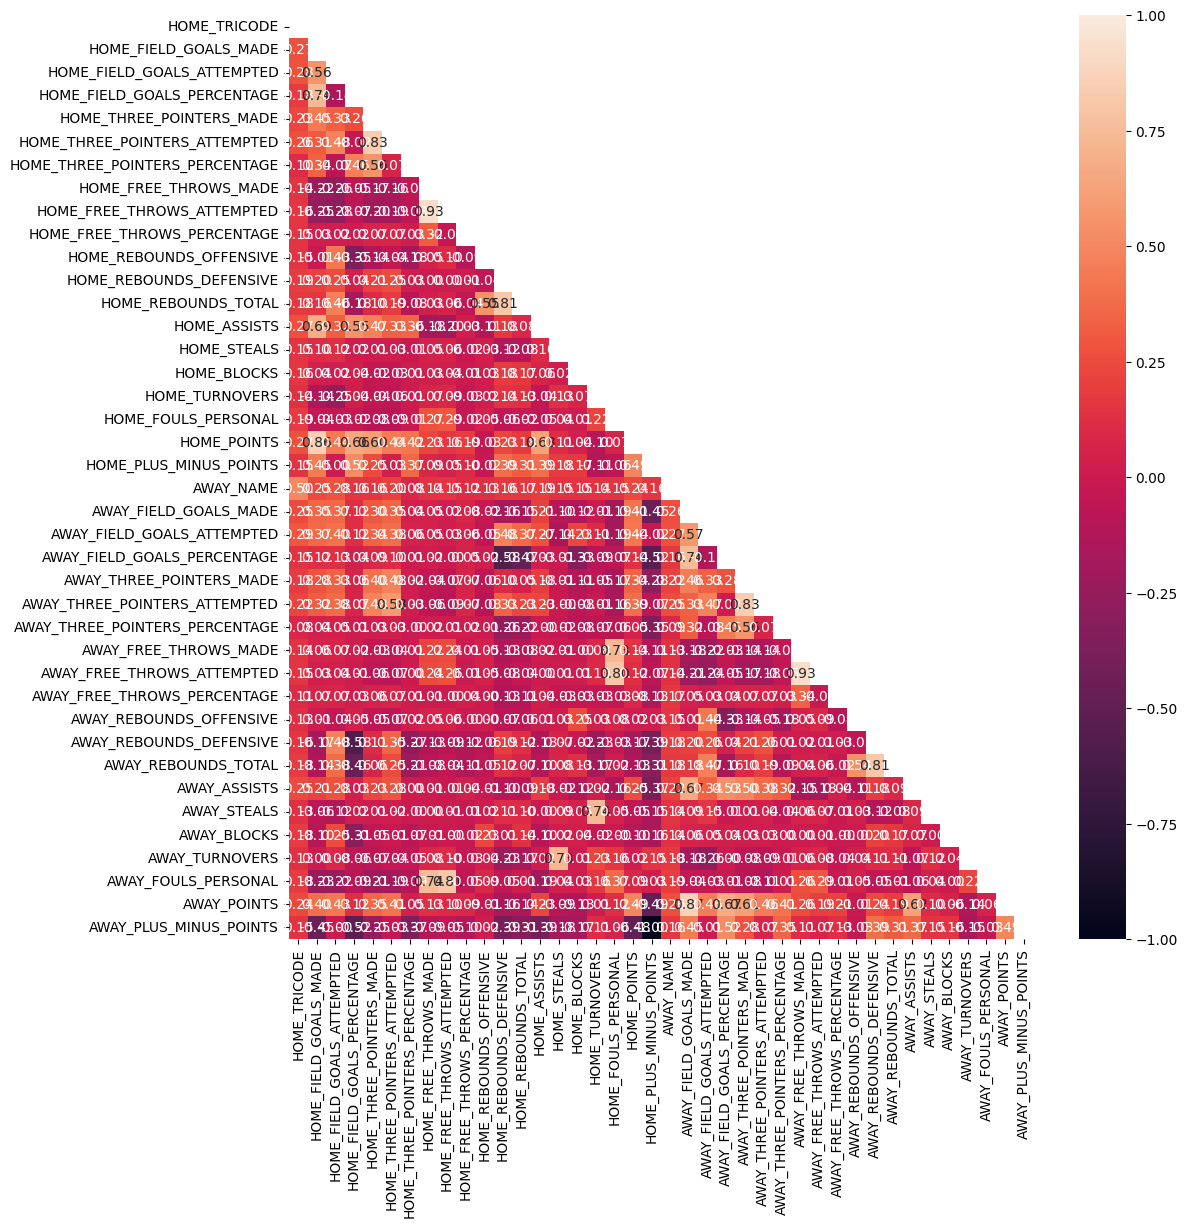

In [137]:
def my_corrplot(df, dep_var):

    # create a correlation matrix of all predictor variables using 'associations'
    corr_matrix = associations(dataset=Nba_Game_Level_data_new.drop('HOME_NAME', axis=1), compute_only=True)['corr']

    # Mask upper triangle of the corr heatmap ???
    mask_upper = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Plot
    plt.figure(figsize=(12,12))
    sns.heatmap(corr_matrix, annot=True, mask=mask_upper, fmt='.2f', vmin=-1, vmax=1)
my_corrplot(Nba_Game_Level_data_new, 'HOME_NAME_Pelicans')

Removing colinear variables

In [138]:
def removeHighCorrFeatures(data,dep_var, thresh):

    # Compute a corr_matrix and obtain abs value of the corr. Recall corrs are in the range [-1,1]
    corr_matrix = associations(dataset=data.drop(dep_var, axis=1), compute_only=True)['corr'].abs()

    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # for loop to drop all features where abs(correlation) > threshold
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column]>thresh)]

    # assign to df
    new_data = data.drop(to_drop, axis=1)

    return new_data

removeHighCorrFeatures(Nba_Game_Level_data_new, 'HOME_NAME', 0.8)

,HOME_NAME,HOME_TRICODE,HOME_FIELD_GOALS_MADE,HOME_FIELD_GOALS_ATTEMPTED,HOME_FIELD_GOALS_PERCENTAGE,HOME_THREE_POINTERS_MADE,HOME_THREE_POINTERS_PERCENTAGE,HOME_FREE_THROWS_MADE,HOME_FREE_THROWS_PERCENTAGE,HOME_REBOUNDS_OFFENSIVE,HOME_REBOUNDS_DEFENSIVE,HOME_ASSISTS,HOME_STEALS,HOME_BLOCKS,HOME_TURNOVERS,HOME_FOULS_PERSONAL,HOME_PLUS_MINUS_POINTS,AWAY_NAME,AWAY_FIELD_GOALS_MADE,AWAY_FIELD_GOALS_ATTEMPTED,AWAY_FIELD_GOALS_PERCENTAGE,AWAY_THREE_POINTERS_MADE,AWAY_THREE_POINTERS_PERCENTAGE,AWAY_FREE_THROWS_MADE,AWAY_FREE_THROWS_PERCENTAGE,AWAY_REBOUNDS_OFFENSIVE,AWAY_REBOUNDS_DEFENSIVE,AWAY_ASSISTS,AWAY_STEALS,AWAY_BLOCKS,AWAY_TURNOVERS
0,Spurs,SAS,29.0,68.0,0.426,7.0,0.636,16.0,0.842,8.0,30.0,14.0,4.0,7.0,13.0,20.0,7.0,Pistons,31.0,74.0,0.419,2.0,0.143,10.0,0.714,8.0,26.0,17.0,8.0,6.0,6.0
1,Spurs,SAS,31.0,75.0,0.413,8.0,0.286,16.0,0.615,13.0,30.0,15.0,3.0,2.0,11.0,18.0,-9.0,Pistons,37.0,79.0,0.468,8.0,0.471,13.0,0.684,13.0,27.0,19.0,6.0,8.0,5.0
2,Pistons,DET,37.0,84.0,0.440,2.0,0.222,19.0,0.826,16.0,26.0,17.0,7.0,11.0,11.0,20.0,-1.0,Spurs,38.0,82.0,0.463,8.0,0.400,12.0,0.571,19.0,26.0,20.0,3.0,3.0,16.0
3,Pistons,DET,41.0,90.0,0.456,2.0,0.222,18.0,0.783,13.0,34.0,23.0,13.0,6.0,3.0,22.0,31.0,Spurs,26.0,70.0,0.371,5.0,0.333,14.0,0.583,12.0,32.0,15.0,1.0,9.0,17.0
4,Pistons,DET,40.0,85.0,0.471,3.0,0.214,13.0,0.765,17.0,27.0,22.0,12.0,10.0,11.0,18.0,17.0,Spurs,29.0,67.0,0.433,8.0,0.471,13.0,0.650,10.0,27.0,16.0,7.0,3.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27652,Grizzlies,MEM,50.0,108.0,0.463,8.0,0.211,19.0,0.905,9.0,38.0,27.0,13.0,11.0,15.0,26.0,5.0,Pacers,45.0,112.0,0.402,13.0,0.245,19.0,0.792,16.0,40.0,30.0,10.0,11.0,17.0
27653,Pistons,DET,47.0,95.0,0.495,11.0,0.314,21.0,0.618,10.0,39.0,33.0,10.0,6.0,16.0,33.0,-4.0,Suns,42.0,95.0,0.442,14.0,0.378,32.0,0.842,11.0,39.0,27.0,8.0,4.0,19.0
27654,Mavericks,DAL,35.0,94.0,0.372,14.0,0.304,12.0,0.706,15.0,36.0,19.0,8.0,6.0,20.0,15.0,-8.0,Timberwolves,39.0,90.0,0.433,14.0,0.452,12.0,0.750,13.0,33.0,25.0,9.0,8.0,18.0
27655,Warriors,GSW,37.0,79.0,0.468,15.0,0.357,14.0,0.667,7.0,42.0,22.0,8.0,7.0,16.0,16.0,13.0,Lakers,34.0,85.0,0.400,12.0,0.375,9.0,0.529,9.0,29.0,18.0,8.0,5.0,14.0


Logistic Regression

In [141]:
#Fit a logistic regression model on the training data
#Print the intercept and model coefficients

# Add a column of ones (similar to the sm.add_constant in Linear Regression)
# Need this column for the 'experimental matrix' and matrix multiplication behind the scenes
train_X = sm.add_constant(train_X)

# Fit a logististic regression model
# using method='lbfgs' to handle potential singularity issues
logit = sm.Logit(train_y, train_X).fit(method='lbfgs')

# Get model output
print(logit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:     HOME_NAME_Pelicans   No. Observations:                22125
Model:                          Logit   Df Residuals:                    21950
Method:                           MLE   Df Model:                          174
Date:                Sun, 13 Apr 2025   Pseudo R-squ.:                 0.05668
Time:                        03:53:42   Log-Likelihood:                -1854.1
converged:                      False   LL-Null:                       -1965.5
Covariance Type:            nonrobust   LLR p-value:                  0.007338
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -0.0050        nan        nan        nan         nan         nan
HOME_FIELD_GOALS_MADE                   0.0113        na